<a href="https://colab.research.google.com/github/saugatrai33/ML-Projects/blob/main/Handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2641 - accuracy: 0.9220
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1106 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0727 - accuracy: 0.9770


In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9703
0.970300018787384
0.09832170605659485


In [7]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model/assets


the result is probably: 3


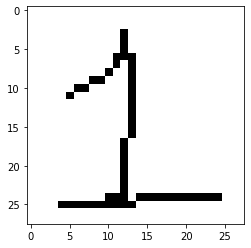

the result is probably: 5


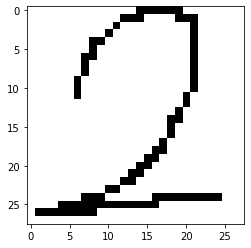

the result is probably: 3


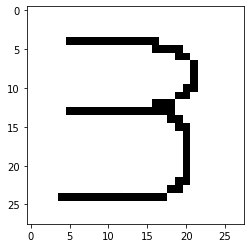

the result is probably: 5


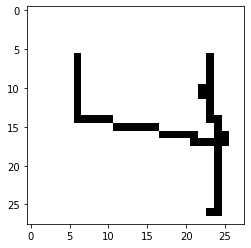

the result is probably: 5


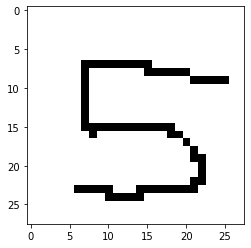

the result is probably: 9


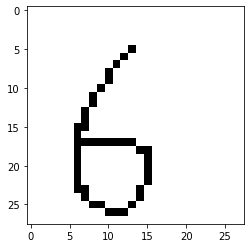

the result is probably: 7


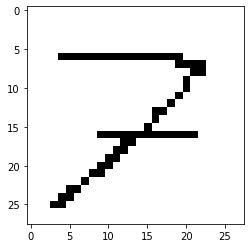

the result is probably: 3


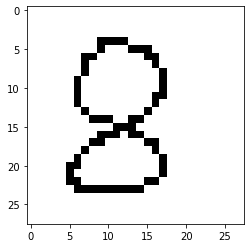

the result is probably: 3


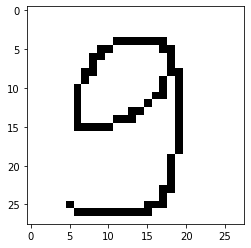

In [10]:
for x in range(1, 10):
    img = cv.imread(f'{x}.png')[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    plt.imshow(img[0], cmap=plt.cm.binary)
    print(f'the result is probably: {np.argmax(prediction)}')
    plt.show()